# **Weather Forecasting**

In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import plotly.express as px 
from neuralprophet import NeuralProphet
from sklearn.preprocessing import LabelEncoder


In [3]:
df=pd.read_csv("seattle-weather.csv")

In [4]:
df.shape

(1461, 6)

In [5]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [8]:
# Converting the Dtype on date from object to datetime
df['date'] = pd.to_datetime(df['date'])

# Data Pre-Processing:

In [10]:
# The column weather contains the data value in the string form and we need to predict the weather data 
# so we convert it to an int as label.
df['weather']=LabelEncoder().fit_transform(df['weather'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 62.9 KB


now we have a good dataframe to be processed

# Data Visualization:

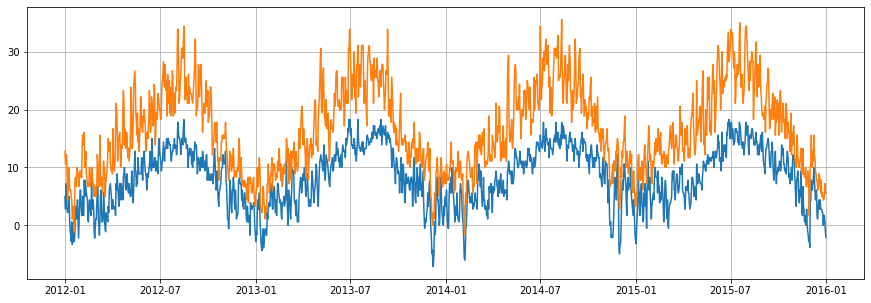

In [28]:
# Visualizing the temperature, observing if there's abnormal data
plt.figure(figsize = (15, 5))
fig = plt.plot(df['date'], df[['temp_min', 'temp_max']])
plt.grid();

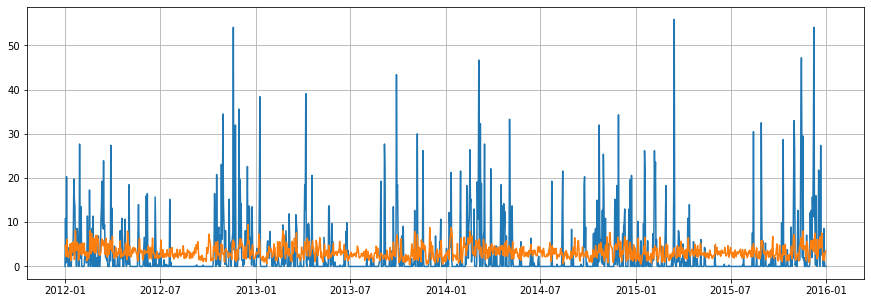

In [26]:
plt.figure(figsize = (15, 5))
fig2 = plt.plot(df['date'], df[['precipitation', 'wind']])
plt.grid();

In [74]:
df['month'] = df['date'].dt.month_name(locale='English')

fig = px.box(df, df.month, ['temp_min', 'temp_max'])
fig.update_layout(title='Warmest and Coldest Monthly Tempratue.')
fig.show()

December has coldest Days in a Year while August has the hottest days in an Year.
December has the least Standard Deviation which means, temperature vary least, while July has the most Standard Deviation.

<AxesSubplot:>

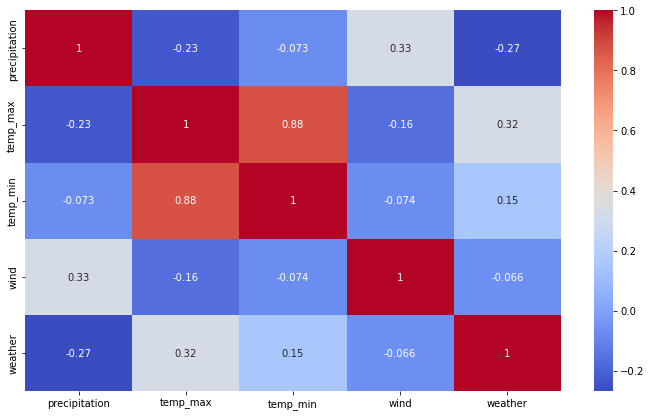

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

We can see that wind and preception are weakly corelated. On the other hand, temp_max and wind are negatively correlated means they move in the opposite direction.

# Training Our Machine Learning Model

In [88]:
from sklearn.model_selection import train_test_split
features=["precipitation", "temp_max", "temp_min", "wind"]
X=df[features]
y=df.weather
X_train, X_test, y_train,y_test = train_test_split(X, y,random_state = 0)

# Random Forest Regressor:

In [17]:
from sklearn.ensemble import RandomForestRegressor

model2=RandomForestRegressor(random_state=1)
model2.fit(train_X, train_y)
pred2=model2.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred2)))
    

Mean Absolute Error: 0.694026


# Extreme Gradient Regressor:

In [82]:
from xgboost import XGBRegressor

model3= XGBRegressor(n_estimators=100, learning_rate=0.04)
model3.fit(train_X, train_y)
pred3=model3.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred3)))
print("XGB Accuracy:{:.2f}%".format(model3.score(test_X,test_y)*100))

Mean Absolute Error: 0.682803
XGB Accuracy:19.84%


In [89]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(X_test,y_test)*100))

XGB Accuracy:78.42%


# Neural Prophet

The least mean absolute error we got is of the XGB Regressor Model. 